## Notebook for STAN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import stan

In [3]:
num_datapoints = 10_000

In [4]:
event_counts = np.random.poisson(2, num_datapoints)

In [5]:
rates = event_counts/4
fatalities_raw = np.random.poisson(rates, num_datapoints)

In [6]:
fatality_flags = ( fatalities_raw > 0 ).astype(int)

In [7]:
fatality_flags

array([1, 1, 0, ..., 1, 1, 1])

In [8]:
prev_fatalities_flag = np.concatenate((np.array([1]), fatality_flags[1:]))

In [9]:
data_dict = {'num_points': len(event_counts),
             'event_counts': event_counts,
             'fatalities_flag':fatality_flags,
             'prev_fatalities_flag': prev_fatalities_flag}

In [10]:
import nest_asyncio
nest_asyncio.apply()

In [11]:
nest_asyncio.apply()
stan_filepath = 'stan_model.stan'
with open(stan_filepath) as f:
    stan_code = f.read()
model = stan.build(stan_code,
                   data=data_dict,
                   random_seed=1)

Building...

cc1plus: warning: command-line option ‘-Wstrict-prototypes’ is valid for C/ObjC but not for C++
In file included from /data/florican/jamiesonball/miniconda3/envs/stan_env/lib/python3.8/site-packages/httpstan/include/boost/multi_array/multi_array_ref.hpp:32,
                 from /data/florican/jamiesonball/miniconda3/envs/stan_env/lib/python3.8/site-packages/httpstan/include/boost/multi_array.hpp:34,
                 from /data/florican/jamiesonball/miniconda3/envs/stan_env/lib/python3.8/site-packages/httpstan/include/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from /data/florican/jamiesonball/miniconda3/envs/stan_env/lib/python3.8/site-packages/httpstan/include/boost/numeric/odeint.hpp:63,
                 from /data/florican/jamiesonball/miniconda3/envs/stan_env/lib/python3.8/site-packages/httpstan/include/stan/math/prim/functor/ode_rk45.hpp:9,
                 from /data/florican/jamiesonball/miniconda3/envs/stan_env/lib/python3.8/site-packages/httpstan


Building: 29.0s, done.

In [12]:
num_samples = 10000
num_chains = 4
num_warmup = 2000
num_thin = 25
refresh = 100
delta = 0.8

In [13]:
samples = model.sample(num_samples=num_samples,
                        num_chains=num_chains,
                        num_warmup=num_warmup,
                        num_thin=num_thin,
                        refresh=refresh,
                        delta=delta)

Sampling:   0%
Sampling:   0% (1/48000)
Sampling:   0% (2/48000)
Sampling:   0% (3/48000)
Sampling:   0% (4/48000)
Sampling:   0% (103/48000)
Sampling:   0% (202/48000)
Sampling:   1% (301/48000)
Sampling:   1% (400/48000)
Sampling:   1% (500/48000)
Sampling:   1% (600/48000)
Sampling:   1% (700/48000)
Sampling:   2% (800/48000)
Sampling:   2% (900/48000)
Sampling:   2% (1000/48000)
Sampling:   2% (1100/48000)
Sampling:   2% (1200/48000)
Sampling:   3% (1300/48000)
Sampling:   3% (1400/48000)
Sampling:   3% (1500/48000)
Sampling:   3% (1600/48000)
Sampling:   4% (1700/48000)
Sampling:   4% (1800/48000)
Sampling:   4% (1900/48000)
Sampling:   4% (2000/48000)
Sampling:   4% (2100/48000)
Sampling:   5% (2200/48000)
Sampling:   5% (2300/48000)
Sampling:   5% (2400/48000)
Sampling:   5% (2500/48000)
Sampling:   5% (2600/48000)
Sampling:   6% (2700/48000)
Sampling:   6% (2800/48000)
Sampling:   6% (2900/48000)
Sampling:   6% (3000/48000)
Sampling:   6% (3100/48000)
Sampling:   7% (3200/48000

In [15]:
import arviz as az
az.summary(samples)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,-6.066,0.314,-6.622,-5.469,0.008,0.006,1520.0,1447.0,1.0
beta_,0.087,0.134,-0.152,0.342,0.004,0.003,1448.0,1220.0,1.0
gamma_,11.612,0.364,10.939,12.303,0.009,0.006,1700.0,1570.0,1.0


array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta_'}>,
        <Axes: title={'center': 'beta_'}>],
       [<Axes: title={'center': 'gamma_'}>,
        <Axes: title={'center': 'gamma_'}>]], dtype=object)

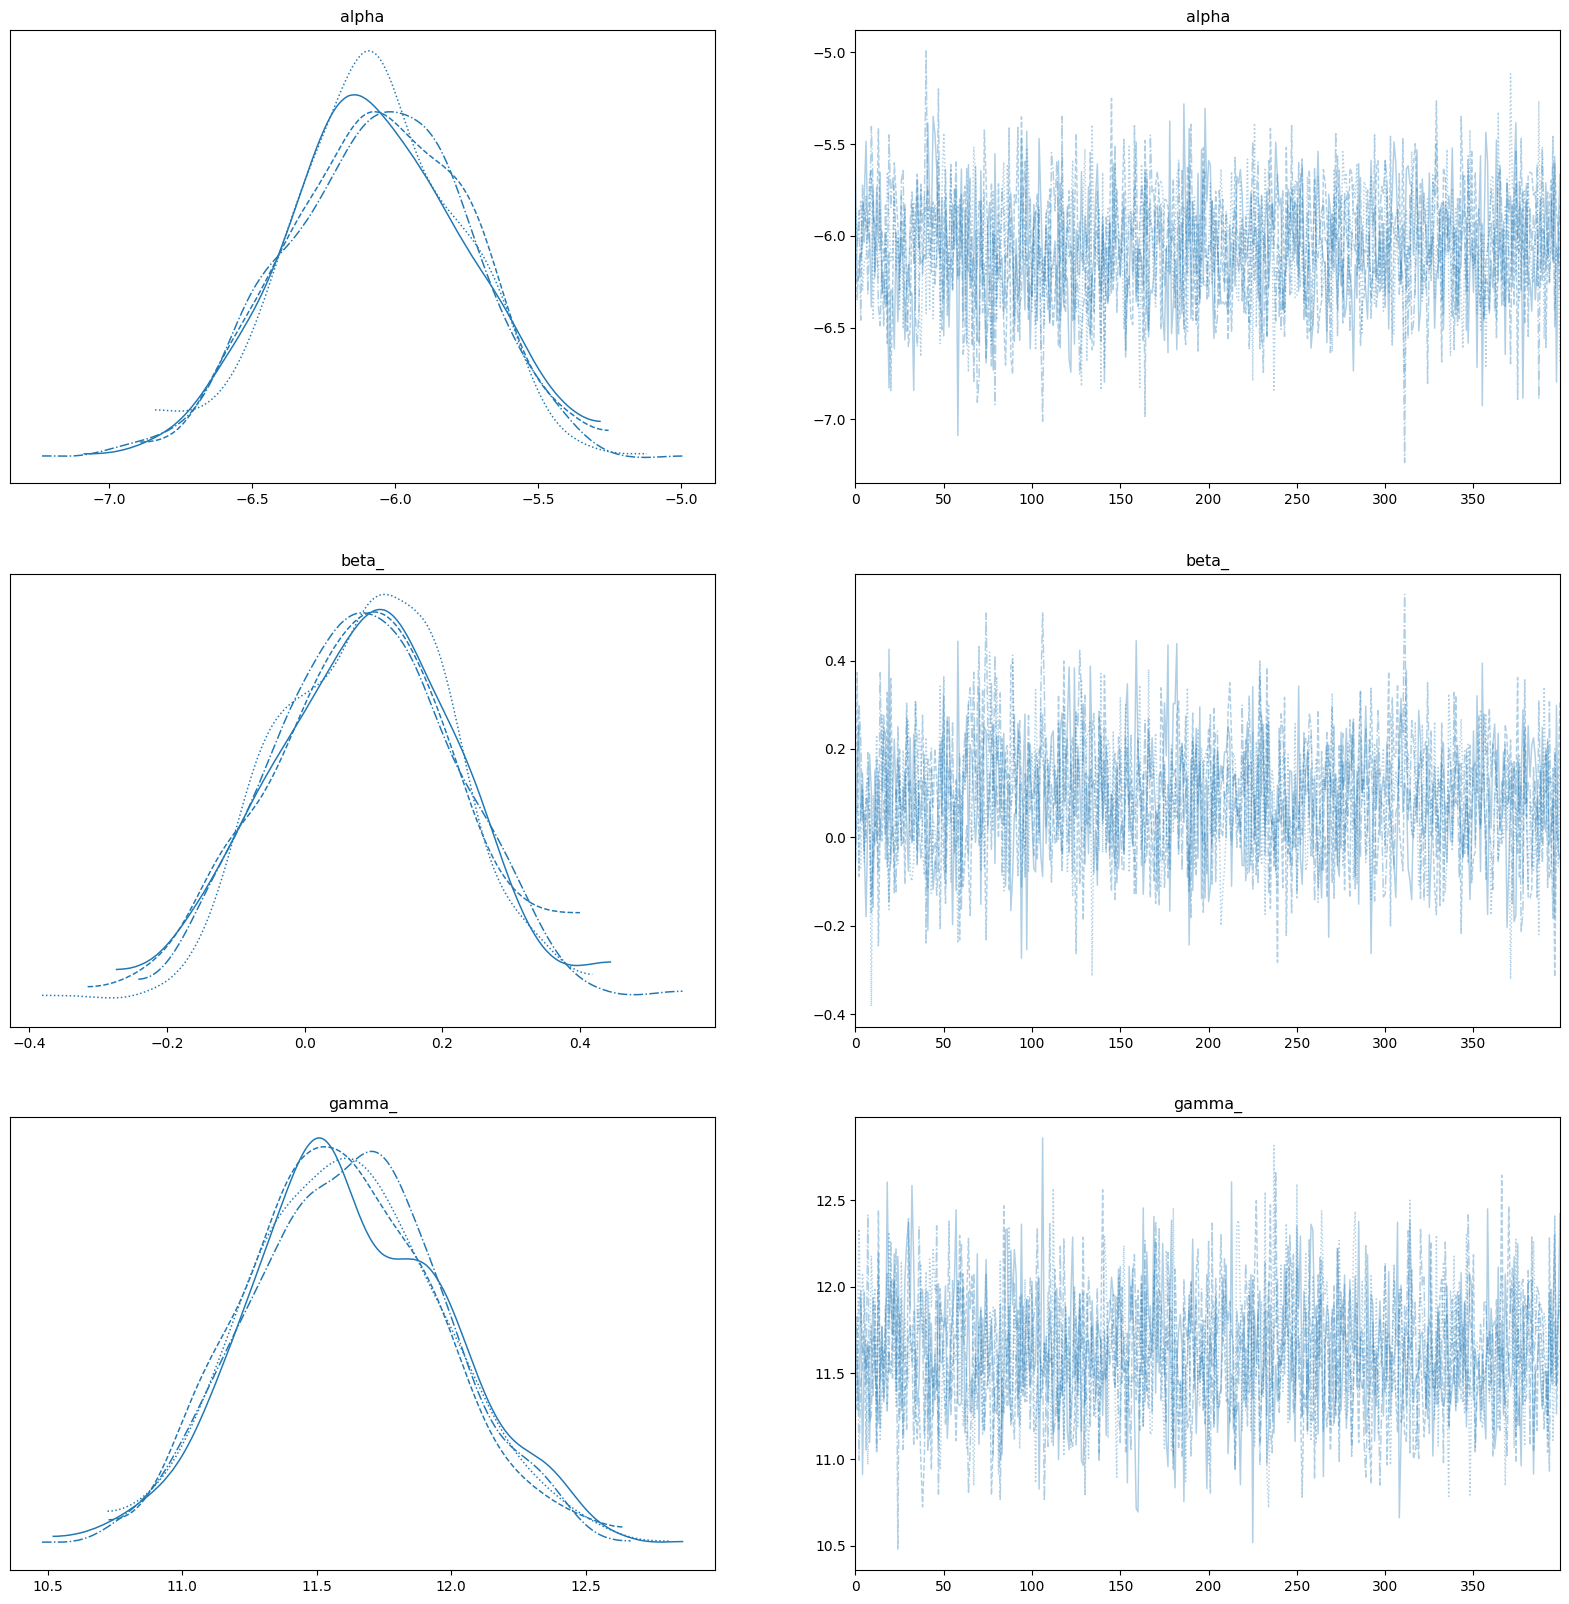

In [16]:
az.plot_trace(samples, figsize=(20, 20))

In [25]:
import seaborn as sns

In [21]:
samples_df = samples.to_frame()

In [23]:
params_df = samples_df[['alpha', 'beta_', 'gamma_']]

/data/florican/jamiesonball/miniconda3/envs/stan_env/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


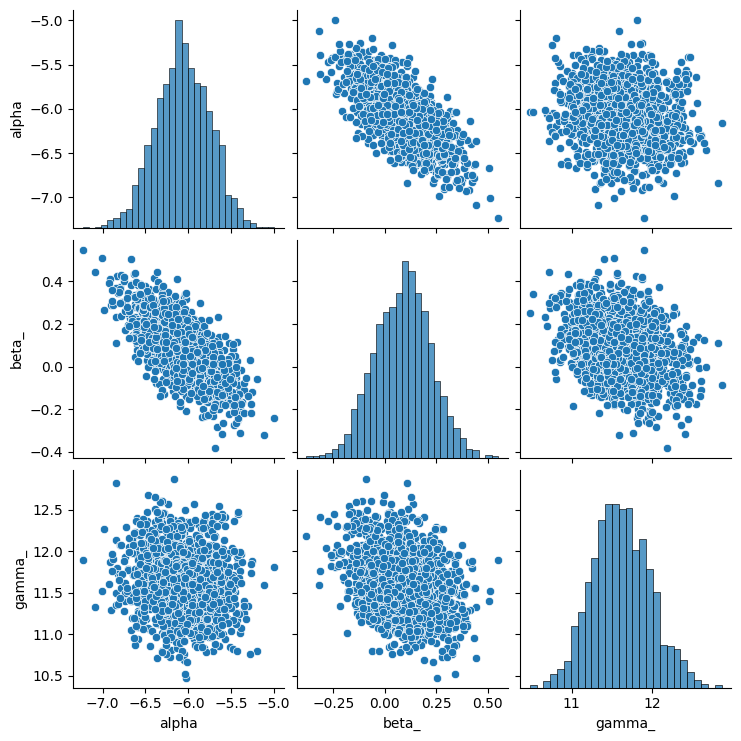

In [24]:
sns.pairplot(params_df)